In [116]:
import json
from collections import defaultdict
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

data_path = '/Users/ahmed/Desktop/msc-24/ECHR/echr-processed/'
d = {}
app_to_item = {}
import os
cases_path = os.listdir(data_path)

import pandas as pd
df1 = pd.read_csv('/Users/ahmed/Desktop/msc-24/TND/kc_classification_data/pre_cutoff_data/df_1.csv')
df2 = pd.read_csv('/Users/ahmed/Desktop/msc-24/TND/kc_classification_data/pre_cutoff_data/df_2.csv')
df3 = pd.read_csv('/Users/ahmed/Desktop/msc-24/TND/kc_classification_data/pre_cutoff_data/df_3.csv')
df4 = pd.read_csv('/Users/ahmed/Desktop/msc-24/TND/kc_classification_data/pre_cutoff_data/df_4.csv')

#combine all data frames
df = pd.concat([df1, df2, df3, df4])
file_paths = df['file_path'].tolist()

for case_path in cases_path:
    case = load_json(data_path + case_path)
    appno  = case['appno']
    title = case['docname']
    extracted_apps = case['extractedappno']
    itemid = case_path.split('.')[0]
    
    if appno in d:
        d[str(appno)].update({itemid: {'title': title, 'extracted_apps': extracted_apps, 'items': []}})
    else:
        d[str(appno)] = {itemid: {'title': title, 'extracted_apps': extracted_apps, 'items': []}}

In [122]:
base_cases = [x.split('.')[0] for x in file_paths]

In [118]:
import networkx as nx

In [119]:
len(cases_path), len(d)

(16096, 15910)

In [108]:
G = nx.DiGraph()

base_cases = [x.split for x in file_paths]

# Add all cases as nodes first
for case_no in d.keys():
    G.add_node(case_no)

In [109]:
# Add edges for citations
for app_no in d:
    cases = d[app_no]
    for case in cases:
        citation = case['extracted_apps']
        for c in citation:
            if c in d:
                G.add_edge(app_no, c)


In [110]:
# check if node in G
def check_node(node):
    if node in G:
        return True
    else:
        return False    

In [111]:
def analyze_citation_network(G):
    """
    Analyze the citation network and print various metrics.
    
    Args:
        G (nx.DiGraph): Citation network graph
    """
    print(f"Number of cases: {G.number_of_nodes()}")
    print(f"Number of citations: {G.number_of_edges()}")
    
    # Calculate in-degree (times cited) for each case
    in_degrees = dict(G.in_degree())
    most_cited = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\nMost cited cases:")
    for case, citations in most_cited:
        print(f"Case {case}: cited {citations} times")
    
    # Calculate out-degree (number of citations made) for each case
    out_degrees = dict(G.out_degree())
    most_citing = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\nCases with most citations:")
    for case, citations in most_citing:
        print(f"Case {case}: cites {citations} other cases")

def find_citation_chain(G, start_case, depth=2):
    """
    Find all cases cited up to a certain depth from the starting case.
    
    Args:
        G (nx.DiGraph): Citation network graph
        start_case (str): Starting case application number
        depth (int): How many levels deep to search
        
    Returns:
        dict: Dictionary of cases at each depth level
    """
    citation_chains = {0: [start_case]}
    current_cases = {start_case}
    
    for level in range(1, depth + 1):
        next_level_cases = set()
        for case in current_cases:
            # Get all cases cited by the current case
            cited_cases = set(G.neighbors(case))
            next_level_cases.update(cited_cases)
        
        citation_chains[level] = list(next_level_cases)
        current_cases = next_level_cases
    
    return citation_chains

In [112]:
analyze_citation_network(G)

Number of cases: 499
Number of citations: 1149

Most cited cases:
Case 5826/03: cited 42 times
Case 23380/09: cited 35 times
Case 76639/11: cited 28 times
Case 72508/13: cited 27 times
Case 16483/12: cited 21 times

Cases with most citations:
Case 41720/13: cites 15 other cases
Case 60561/14: cites 14 other cases
Case 26374/18: cites 13 other cases
Case 14305/17: cites 13 other cases
Case 72508/13: cites 12 other cases


In [95]:
check_node('5084/18')

True

In [ ]:
# print 5 random

In [96]:
find_citation_chain(G, '5084/18', depth=2)

{0: ['5084/18'],
 1: ['57592/08',
  '42750/09',
  '8927/11',
  '25978/07',
  '41216/13',
  '2440/07',
  '5084/18',
  '72508/13',
  '31240/03',
  '21906/04',
  '30500/11'],
 2: ['29750/09',
  '36042/97',
  '35403/06',
  '1111/02',
  '67385/01',
  '29826/15',
  '37311/08',
  '18968/07',
  '31195/96',
  '2763/13',
  '74025/01',
  '23531/94',
  '40008/04',
  '126/05',
  '6492/11',
  '20134/05',
  '59334/00',
  '26629/95',
  '54810/00',
  '33354/96',
  '31575/03',
  '67263/01',
  '69981/14',
  '60259/11',
  '30943/96',
  '27866/03',
  '30779/04',
  '28793/02',
  '43808/07',
  '30210/96',
  '41418/04',
  '18996/06',
  '35615/06',
  '20261/12',
  '11773/08',
  '24888/94',
  '4646/08',
  '12694/04',
  '67474/11',
  '42615/06',
  '30315/10',
  '1774/11',
  '24478/03',
  '40679/98',
  '14737/08',
  '23763/94',
  '49905/08',
  '36941/02',
  '22768/12',
  '32362/02',
  '30078/06',
  '29226/03',
  '44774/98',
  '16995/05',
  '2229/15',
  '40107/02',
  '25803/94',
  '39804/04',
  '32772/02',
  '4170

In [99]:
def visualize_network(G, highlight_case=None, max_nodes=1000):
    """
    Optimized visualization for large legal citation networks.
    
    Args:
        G (nx.DiGraph): Citation network graph
        highlight_case (str, optional): Case to highlight and show immediate connections
        max_nodes (int): Maximum number of nodes to visualize
    """
    import matplotlib.pyplot as plt
    import networkx as nx
    
    # If graph is too large, create a subgraph of most important nodes
    if G.number_of_nodes() > max_nodes:
        # Calculate PageRank to identify most important cases
        pagerank = nx.pagerank(G, alpha=0.85, max_iter=100)
        important_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:max_nodes]
        important_nodes = [node[0] for node in important_nodes]
        
        # Create subgraph with important nodes
        G = G.subgraph(important_nodes)
    
    plt.figure(figsize=(20, 20))
    
    # Use faster layout algorithm for large graphs
    pos = nx.spring_layout(
        G,
        k=1/np.sqrt(G.number_of_nodes()),  # Optimal distance between nodes
        iterations=50,  # Reduce iterations for speed
        seed=42  # For reproducibility
    )
    
    # Draw with optimized parameters
    nx.draw_networkx_nodes(
        G, pos,
        node_color='lightblue',
        node_size=20,  # Smaller nodes
        alpha=0.6,  # Some transparency
        node_shape='o'
    )
    
    nx.draw_networkx_edges(
        G, pos,
        edge_color='gray',
        alpha=0.1,  # Very transparent edges
        arrows=False,  # Remove arrows for better performance
        width=0.1  # Thinner edges
    )
    
    # Only show labels for nodes with high degree
    labels = {}
    for node in G.nodes():
        if G.degree(node) > G.number_of_nodes() * 0.05:  # Show labels for nodes with high connectivity
            labels[node] = node
    nx.draw_networkx_labels(G, pos, labels, font_size=6)
    
    if highlight_case and highlight_case in G:
        # Highlight the selected case and its immediate connections
        neighbors = list(G.neighbors(highlight_case))
        predecessors = list(G.predecessors(highlight_case))
        
        nx.draw_networkx_nodes(G, pos, 
                             nodelist=[highlight_case],
                             node_color='red',
                             node_size=100)
        nx.draw_networkx_nodes(G, pos,
                             nodelist=neighbors,
                             node_color='green',
                             node_size=50)
        nx.draw_networkx_nodes(G, pos,
                             nodelist=predecessors,
                             node_color='yellow',
                             node_size=50)
        
        # Always show label for highlighted case
        plt.annotate(highlight_case,
                    xy=pos[highlight_case],
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.7))
    
    plt.title("Legal Case Citation Network (Most Important Cases)")
    plt.axis('off')
    
    # Use a tight layout to maximize space usage
    plt.tight_layout()
    
    # Optional: save to file instead of displaying
    # plt.savefig('citation_network.png', dpi=300, bbox_inches='tight')
    plt.show()

# Additional helper function for community detection
def analyze_communities(G):
    """
    Analyze community structure in the network using the Louvain method.
    Returns communities and their key cases.
    """
    import community
    
    # Detect communities
    communities = community.best_partition(G.to_undirected())
    
    # Count number of nodes in each community
    community_sizes = {}
    for node, community_id in communities.items():
        if community_id not in community_sizes:
            community_sizes[community_id] = 0
        community_sizes[community_id] += 1
    
    # Find central nodes in each community
    community_central_nodes = {}
    for community_id in set(communities.values()):
        community_nodes = [node for node in G.nodes() if communities[node] == community_id]
        community_subgraph = G.subgraph(community_nodes)
        # Use degree centrality to find important nodes
        centrality = nx.degree_centrality(community_subgraph)
        # Get top 3 nodes by centrality
        central_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:3]
        community_central_nodes[community_id] = [node[0] for node in central_nodes]
    
    return communities, community_sizes, community_central_nodes

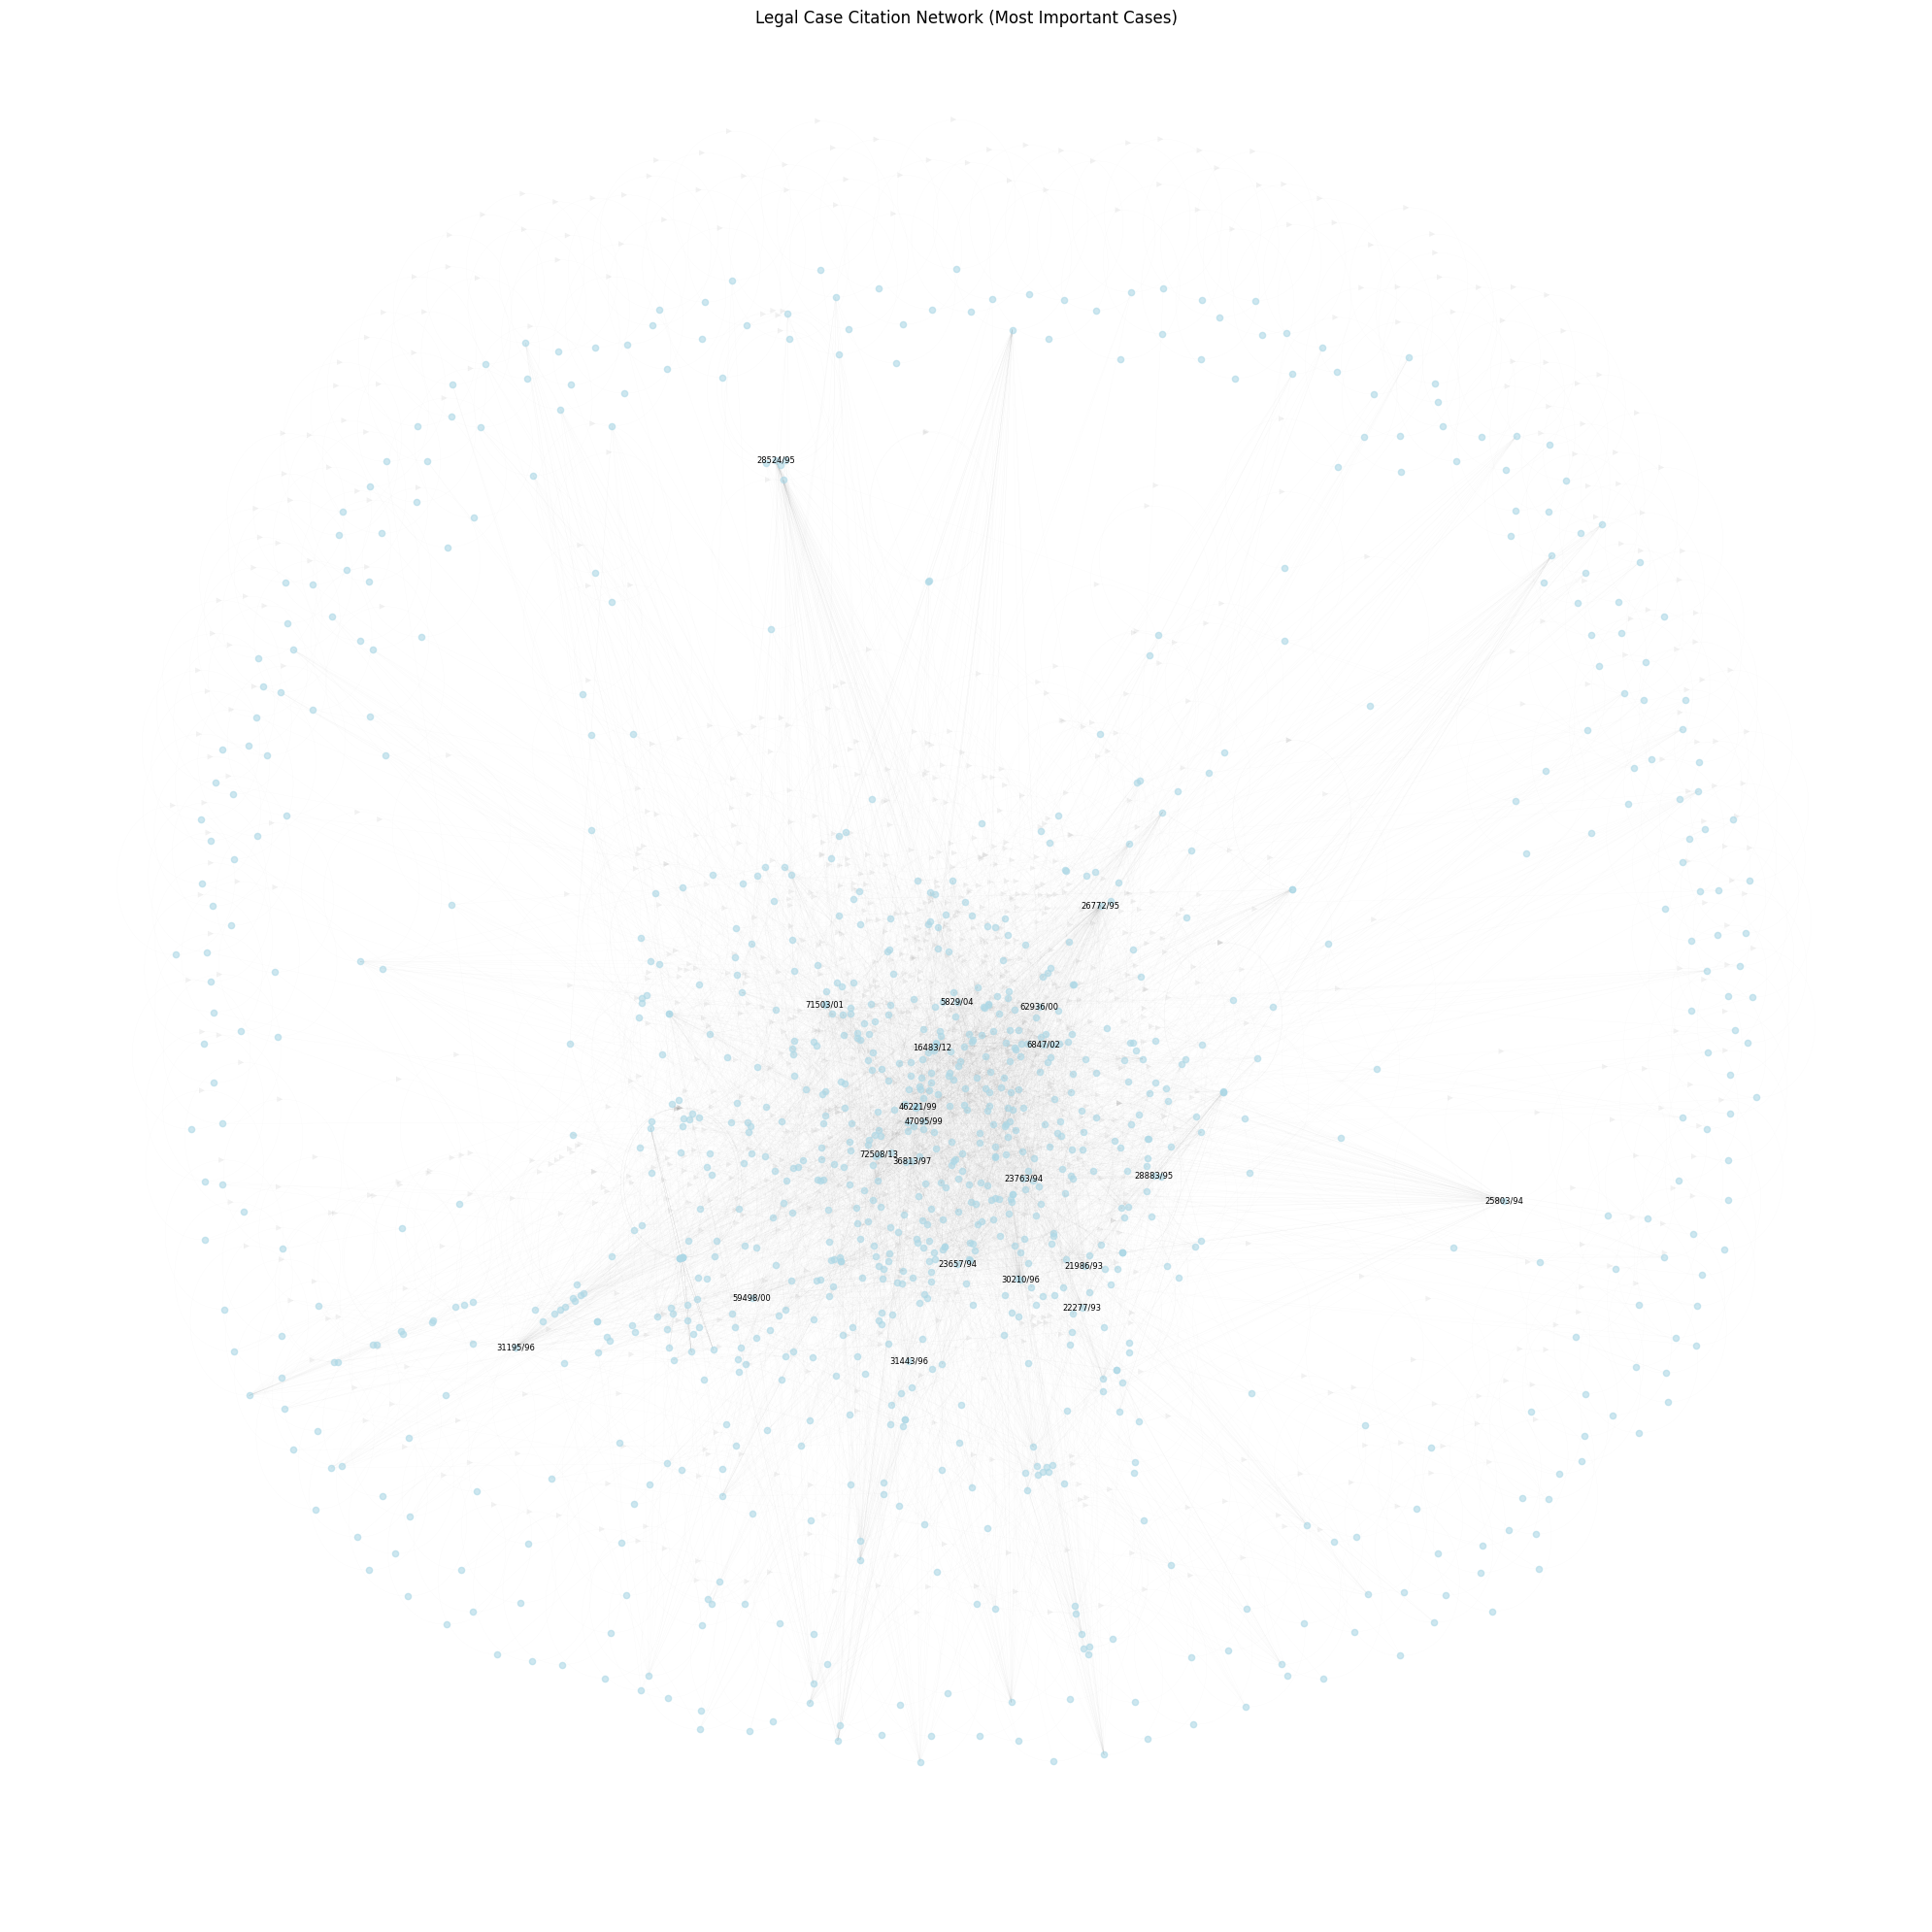

In [101]:
import numpy as np
visualize_network(G, highlight_case='5084/18')

In [103]:
analyze_communities(G)

({'27243/95': 0,
  '21890/03': 1,
  '6544/05': 1,
  '24139/20': 3,
  '30754/04': 0,
  '47152/06': 1,
  '71572/01': 1,
  '25771/03': 0,
  '74507/01': 3,
  '49158/99': 1,
  '37685/02': 10,
  '46284/99': 3,
  '44765/08;10607/10': 1,
  '38903/16;39614/16;39741/16;40693/16;40863/16;43443/16;50279/16;60932/16;61290/16;63340/16': 5,
  '56793/00': 3,
  '50064/18;54135/18;6674/19;6719/19;6730/19;6949/19;6975/19;7043/19;7335/19;7391/19;7394/19;7419/19;7421/19;7694/19;7697/19;7831/19;8221/19;8235/19;8796/19;8810/19;8891/19;8966/19;21185/19;47516/19;49646/19;55941/19;64256/19': 163,
  '30165/02': 29,
  '55555/08': 29,
  '16718/90': 8,
  '62844/00': 12,
  '56637/10;59856/10;72525/10;7646/11;12592/11': 16,
  '25702/94': 19,
  '40732/98': 3,
  '49994/14': 3,
  '15670/04': 3,
  '13700/22;13708/22': 12,
  '44027/09': 3,
  '12854/13;28570/13;76329/13': 163,
  '4772/06': 5,
  '16552/02': 29,
  '28539/16': 29,
  '56787/16': 3,
  '60399/15': 19,
  '3380/10;33725/10': 12,
  '2778/18;8520/18;20076/18;20083/1

In [1]:
file_path = '/Users/ahmed/Desktop/msc-24/ECHR/echr-processed/'

In [2]:
import json
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [3]:
case = load_json(file_path + '001-220960.json')

In [49]:
import re
from dataclasses import dataclass
from typing import List, Optional
from datetime import datetime

@dataclass
class Citation:
    case_name: str
    country: Optional[str] = None  # Made optional for "cited above" cases without country
    application_numbers: List[str] = None
    paragraphs: Optional[str] = None
    date: Optional[str] = None
    echr_year: Optional[str] = None
    is_grand_chamber: bool = False
    is_decision: bool = False
    is_cited_above: bool = False
    has_extracts: bool = False
    cited_with: List[str] = None
    references_contained: bool = False

    def __post_init__(self):
        if self.application_numbers is None:
            self.application_numbers = []
        if self.cited_with is None:
            self.cited_with = []

def extract_citations(text: str) -> List[Citation]:
    citations = []
    
    # Pattern for full citations
    full_pattern = r"""
        # Case name with optional (no. X) and special characters
        ([A-Za-zíñ\s-]+(?:\s+\(no\.\s+\d+\))?)
        
        # Optional country part with v.
        (?:\s+v\.\s+([A-Za-z\s-]+))?
        
        # Optional (dec.) or [GC] designation
        (?:\s+\(dec\.\))?(?:\s+\[GC\])?
        
        # Application numbers including "and X others"
        (?:,\s+(?:nos?\.\s+)([\d/]+(?:\s+and\s+\d+\s+others?)?))?
        
        # Paragraph references (both §§ and plain numbers)
        (?:,\s+(?:§§?\s+)?(\d+(?:-\d+)?))?
        
        # Date or ECHR year with optional (extracts)
        (?:,\s+(?:(\d+\s+[A-Za-z]+\s+\d{4})|ECHR\s+(\d{4})(?:-[A-Z]+)?))
        (?:\s+\(extracts\))?
    """
    
    # Pattern for "cited above" references
    cited_above_pattern = r"""
        ([A-Za-zíñ\s-]+(?:\s+\(no\.\s+\d+\))?)
        (?:\s+\(cited\s+above,\s+(?:§§?\s+)?(\d+(?:-\d+)?)\))
    """
    
    def process_match(match, pattern_type="full"):
        if pattern_type == "full":
            citation = Citation(
                case_name=match.group(1).strip(),
                country=match.group(2).strip() if match.group(2) else None,
                application_numbers=[num.strip() for num in match.group(3).split('and')] if match.group(3) else [],
                paragraphs=match.group(4),
                date=match.group(5),
                echr_year=match.group(6),
                is_grand_chamber='[GC]' in text[match.start():match.end()],
                is_decision='(dec.)' in text[match.start():match.end()],
                has_extracts='(extracts)' in text[match.start():match.end()],
                references_contained='contained therein' in text[match.end():match.end()+30]
            )
        else:  # cited above
            citation = Citation(
                case_name=match.group(1).strip(),
                paragraphs=match.group(2),
                is_cited_above=True
            )
        return citation

    # Find all matches
    current_group = []
    
    # Process full citations
    for match in re.finditer(full_pattern, text, re.VERBOSE | re.IGNORECASE):
        citation = process_match(match, "full")
        
        if ';' in text[match.end():match.end()+2]:
            current_group.append(citation)
        else:
            if current_group:
                current_group.append(citation)
                for c in current_group:
                    c.cited_with = [other.case_name for other in current_group if other != c]
                citations.extend(current_group)
                current_group = []
            else:
                citations.append(citation)
    
    # Process "cited above" references
    for match in re.finditer(cited_above_pattern, text, re.VERBOSE):
        citation = process_match(match, "cited_above")
        citations.append(citation)
    
    return citations

def format_citation(citation: Citation) -> str:
    """Format a Citation object back into a string representation."""
    parts = []
    
    # Case name and country
    if citation.is_cited_above:
        parts.append(f"{citation.case_name} (cited above, {citation.paragraphs})")
        return ", ".join(parts)
    
    parts.append(citation.case_name)
    if citation.country:
        parts.append(f"v. {citation.country}")
    
    if citation.is_decision:
        parts.append("(dec.)")
    if citation.is_grand_chamber:
        parts.append("[GC]")
    
    if citation.application_numbers:
        app_nums = " and ".join(citation.application_numbers)
        parts.append(f"no. {app_nums}")
        
    if citation.paragraphs:
        parts.append(f"§§ {citation.paragraphs}")
        
    if citation.date:
        parts.append(citation.date)
    elif citation.echr_year:
        parts.append(f"ECHR {citation.echr_year}")
    
    if citation.has_extracts:
        parts.append("(extracts)")
        
    if citation.references_contained:
        parts.append("and the references contained therein")
    
    return ", ".join(parts)

In [50]:
citations = extract_citations(case['facts'] + case['other']+ case['law'])
for citation in citations:
    print(format_citation(citation))
    if citation.cited_with:
        print("------Cited together with:", ", ".join(citation.cited_with))
    print()

Ruban, v. Ukraine, no. 8927/11, §§ 20-22, 12 July 2016

he referred to Vinter and Others, v. the United Kingdom, [GC], no. 66069/09 and 2 others, §§ 124-30, ECHR 2013, (extracts)

Hutchinson, v. the United Kingdom, [GC], no. 57592/08, §§ 42-45, 17 January 2017

the Government cited Ciok, v. Poland, (dec.), no. 498/10, §§ 32-33, 23 October 2012

see Kafkaris, v. Cyprus, [GC], no. 21906/04, §§ 142, ECHR 2008

and Del R o Prada, v. Spain, [GC], no. 42750/09, §§ 83, ECHR 2013

Grava, v. Italy, no. 43522/98, §§ 51, 10 July 2003
------Cited together with: Csosz nszki v Sweden

Csosz nszki v Sweden, (dec.), no. 22318/02, 27 June 2006
------Cited together with: Grava

and Szab, v. Sweden, (dec.), no. 28578/03, 27 June 2006

see M ller, v. the Czech Republic, (dec.), no. 48058/09, 6 September 2011

see Welch, v. the United Kingdom, 9 February 1995

see Zehnalov and Zehnal, v. the Czech Republic, (dec.), no. 38621/97, ECHR 2002

cases on extradition - Soldatenko, v. Ukraine, no. 2440/07, 23 Octo

In [36]:
full = case['facts'] + case['other']+ case['law']

In [69]:
citations

[Citation(case_name='Ruban', country='Ukraine', application_numbers=['8927/11'], paragraphs='20-22', date='12 July 2016', echr_year=None, is_grand_chamber=False, is_decision=False, is_cited_above=False, has_extracts=False, cited_with=[], references_contained=False),
 Citation(case_name='he referred to Vinter and Others', country='the United Kingdom', application_numbers=['66069/09', '2 others'], paragraphs='124-30', date=None, echr_year='2013', is_grand_chamber=True, is_decision=False, is_cited_above=False, has_extracts=True, cited_with=[], references_contained=False),
 Citation(case_name='Hutchinson', country='the United Kingdom', application_numbers=['57592/08'], paragraphs='42-45', date='17 January 2017', echr_year=None, is_grand_chamber=True, is_decision=False, is_cited_above=False, has_extracts=False, cited_with=[], references_contained=False),
 Citation(case_name='the Government cited Ciok', country='Poland', application_numbers=['498/10'], paragraphs='32-33', date='23 October 20